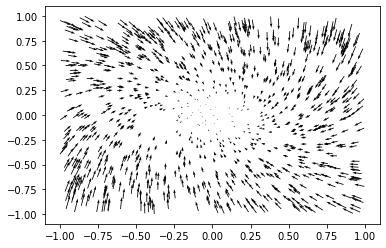

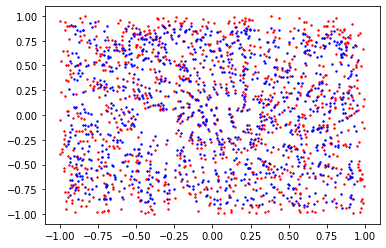

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Open the x0 file and read the data
with open('linear_vectorfield_data_x0.txt', 'r') as file:
    x0_data = []
    for line in file:
        # Split the line into x0 and x1 values and convert them to floats
        x0, x1 = map(float, line.strip().split())
        x0_data.append([x0, x1])

# Open the x1 file and read the data
with open('linear_vectorfield_data_x1.txt', 'r') as file:
    x1_data = []
    for line in file:
        # Split the line into x0 and x1 values and convert them to floats
        x0, x1 = map(float, line.strip().split())
        x1_data.append([x0, x1])

x0_data = np.array(x0_data)
x1_data = np.array(x1_data)


# Plot the vector field
plt.quiver(x0_data[:, 0], x0_data[:, 1], x1_data[:, 0] - x0_data[:, 0], x1_data[:, 1] - x0_data[:, 1], angles='xy', scale_units='xy', scale=1)
plt.show()
# Scatter points
plt.scatter(x0_data[:, 0], x0_data[:, 1], s=2,color='red')
plt.scatter(x1_data[:, 0], x1_data[:, 1], s=2,color='blue')
plt.show()

In [3]:
# Calculate the vectors v(k) using the finite difference formula
v = (x1_data - x0_data) / 0.1

# Use the x0 points as training data and the v vectors as labels
X = x0_data
y = v

# Add a column of ones to the X data to represent the intercept term
X = np.hstack([np.ones((len(X), 1)), X])

# Solve the normal equation to find the coefficients of the linear regression model
coef = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# The matrix A is the coefficients of the model, excluding the intercept term
A = coef[1:]

print('A =', A) 

# Mean Squared Error
MSE = np.mean((y - X.dot(coef)) ** 2)
print('MSE =', MSE)


A = [[-0.49355245 -0.4638232 ]
 [ 0.23191153 -0.95737573]]
MSE = 5.2521428498247534e-15


In [16]:
from scipy.integrate import solve_ivp

# Define the function that represents the ODE dx/dt = Ax
def ode_function(t, x):
    return A.dot(x)

# Set the initial condition and time range for the ODE solver
t_eval = np.linspace(0, 0.1, 1000)
x0 = np.array(x0_data)
mse = 0
count = 0
solutions = []

for x_0s in x0:
    # Solve the ODE and get the solution at the specified time points
    solution = solve_ivp(ode_function, (0, 0.1), x_0s, t_eval=t_eval)
    solutions.append([solution.y[0,:], solution.y[1,:]])
    # Calculate the mean squared error between the solution and the known points x(k)
    count += 1
    new_mse = np.mean((solution.y.T - x1_data)**2)
    mse += new_mse


print('MSE =', mse/count)

MSE = 0.6061461562178321


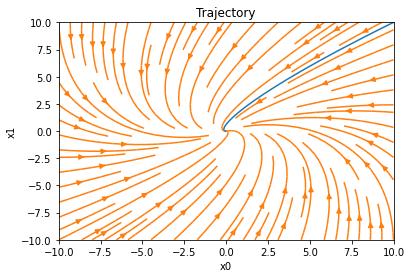

In [5]:
import matplotlib.pyplot as plt

# Set the initial condition and time range for the ODE solver
t_eval = np.linspace(0, 100, 1000)
x0 = np.array([10, 10])

# Solve the ODE and get the solution at the specified time points
solution = solve_ivp(ode_function, (0, 100), x0, t_eval=t_eval)

# Plot the trajectory of the solution
plt.plot(solution.y[0], solution.y[1])
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Trajectory')

w = 10  # width
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

U, V = (A @ np.row_stack([X.ravel(), Y.ravel()]))[0,:].reshape(X.shape), (A @ np.row_stack([X.ravel(), Y.ravel()]))[1,:].reshape(X.shape)

plt.streamplot(X, Y, U, V, density=1.0)
plt.show()

